# MindInsight Classifier: Unveiling Mental Health Patterns in Pandemic Discourse through Data-Driven Analysis

Let us first import the pertinent libraries.

In [4]:
#!pip install wordcloud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mental_disorders_reddit.csv')

In [3]:
df.head()

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


### Data Preprocessing and Simple EDA (Part 1)

In [4]:
print(df.shape)

(701787, 5)


In [5]:
df.isnull().sum()

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

In [6]:
df = df.dropna(subset=['selftext'], how='any')

In [7]:
df.isnull().sum()

title          42
selftext        0
created_utc     0
over_18         0
subreddit       0
dtype: int64

In [8]:
df['subreddit'].value_counts()

BPD              233125
Anxiety          167059
depression       156717
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

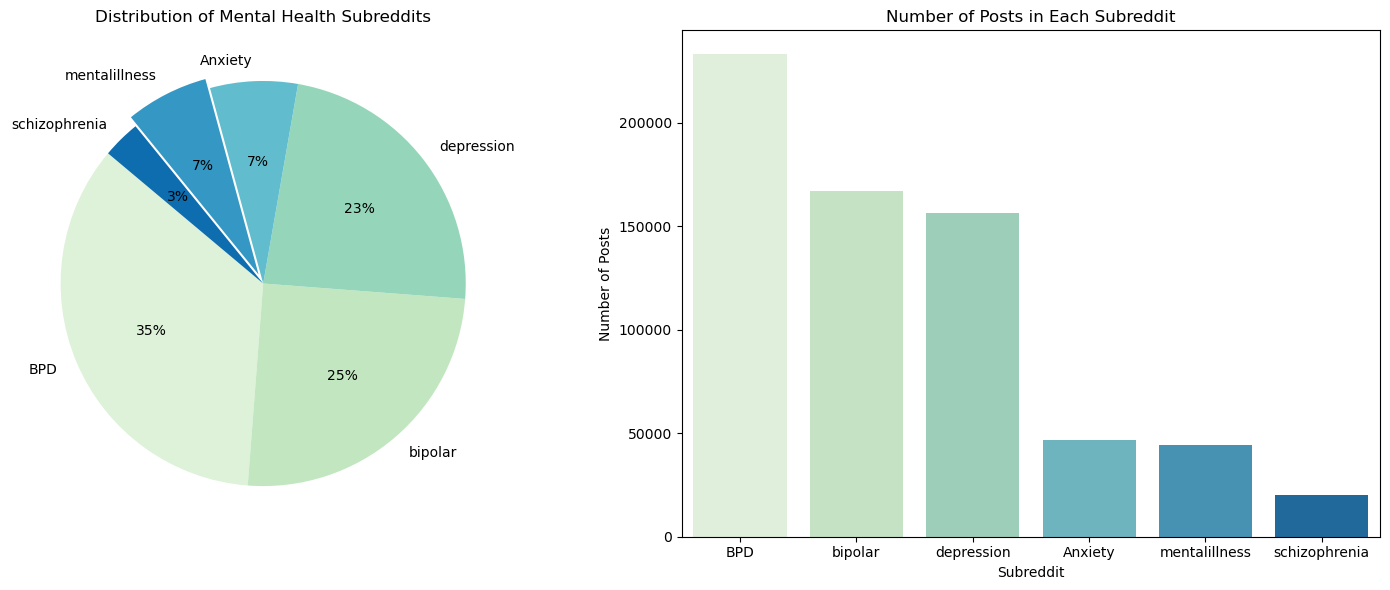

In [9]:
# Data
labels = ['BPD', 'bipolar', 'depression', 'Anxiety', 'mentalillness', 'schizophrenia']
sizes = [233119, 167032, 156708, 46666, 44249, 20280]
custom_colors = sns.color_palette('GnBu', n_colors=len(labels))

# Pie chart
plt.figure(figsize=(15, 6))

# Subplot 1 - Pie Chart
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, textprops={'fontsize': 10}, startangle=140,
        autopct='%1.0f%%', colors=custom_colors, explode=[0, 0, 0, 0, 0.05, 0])
plt.title('Distribution of Mental Health Subreddits')

# Subplot 2 - Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=sizes, palette='GnBu')
plt.title('Number of Posts in Each Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot

In [10]:
df['title'] = df['title'].fillna('')

# Calculate the total number of words in 'title'
df['title_total'] = df['title'].apply(lambda x: len(x.split()))

# Define a function to count total characters in a text (excluding spaces)
def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

# Calculate the total number of characters in 'title'
df['title_chars'] = df['title'].apply(count_total_words)

In [11]:
df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD,6,30
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD,2,9
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD,6,16
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD,3,21
4,help,[removed],1650350907,False,BPD,1,4


In [12]:
df['text_total'] = df['selftext'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['text_chars'] = df["selftext"].apply(count_total_words)

In [13]:
df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD,6,30,74,310
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD,2,9,517,2259
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD,6,16,145,545
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD,3,21,821,3282
4,help,[removed],1650350907,False,BPD,1,4,1,9


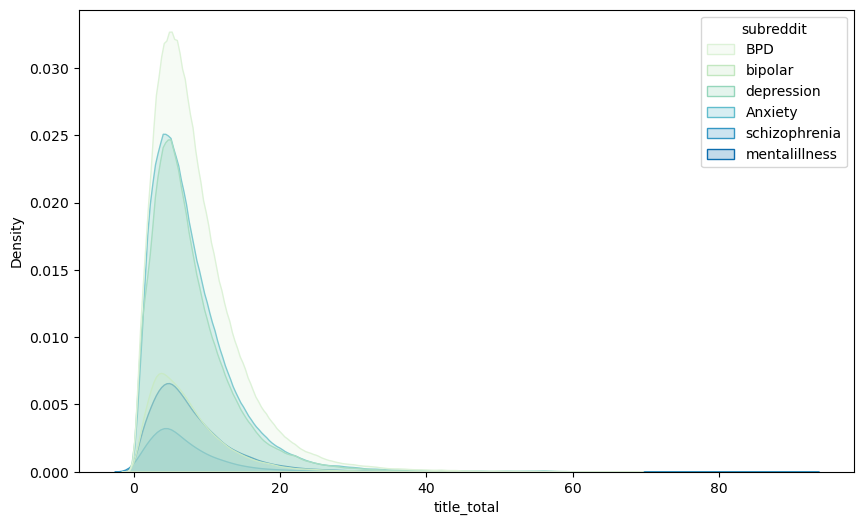

In [14]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['title_total'], hue= df['subreddit'], palette= 'GnBu', shade = True)
plt.show()

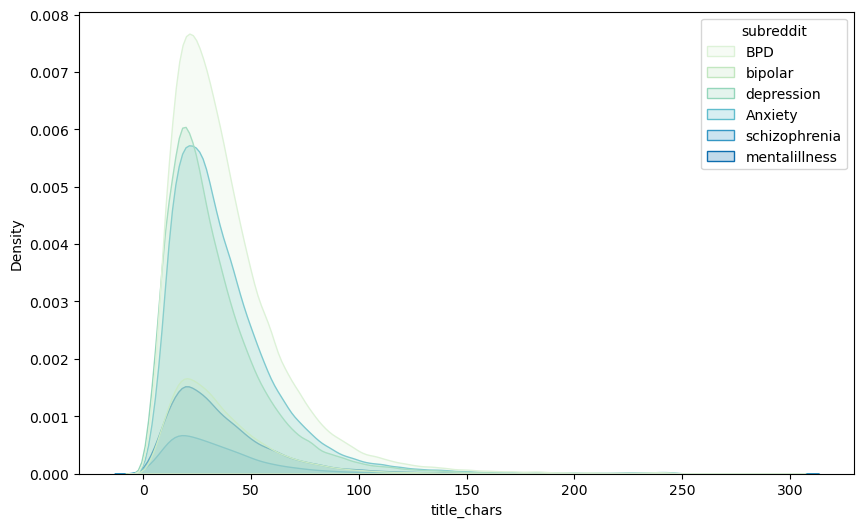

In [15]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['title_chars'], hue= df['subreddit'], palette= 'GnBu', shade = True)
plt.show()

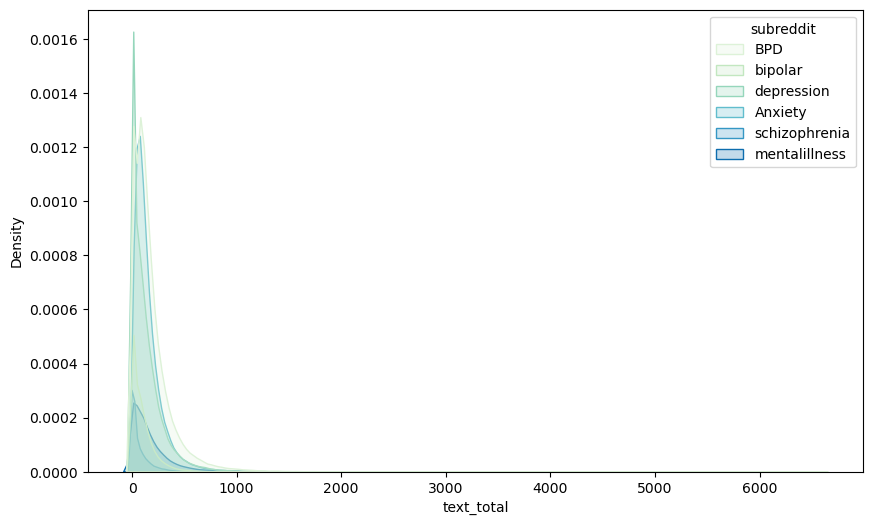

In [16]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['text_total'], hue= df['subreddit'], palette= 'GnBu', shade = True)
plt.show()

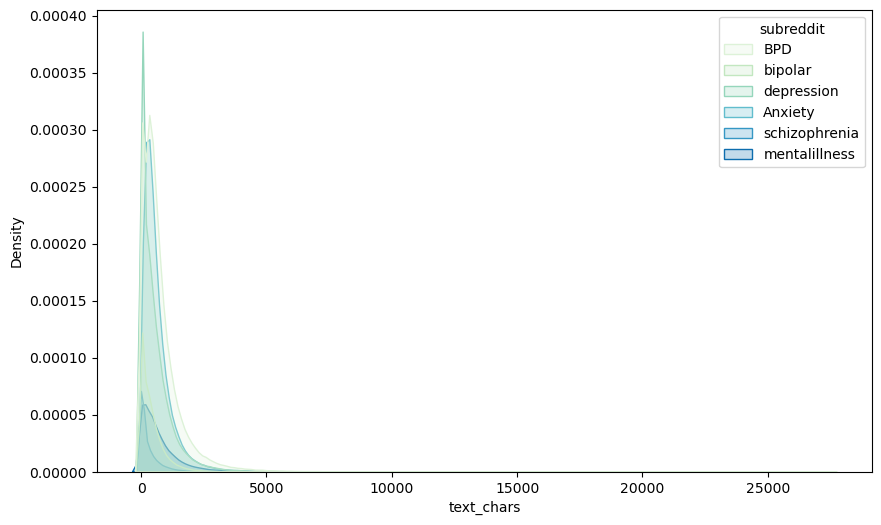

In [17]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['text_chars'], hue= df['subreddit'], palette= 'GnBu', shade = True)
plt.show()

### Data Downsizing

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668096 entries, 0 to 701786
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   title        668096 non-null  object
 1   selftext     668096 non-null  object
 2   created_utc  668096 non-null  int64 
 3   over_18      668096 non-null  bool  
 4   subreddit    668096 non-null  object
 5   title_total  668096 non-null  int64 
 6   title_chars  668096 non-null  int64 
 7   text_total   668096 non-null  int64 
 8   text_chars   668096 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 62.6+ MB


The number of data is 666,8096. It is very large and takes a lot of time to process. As we wish to spotlight on posts published during the duration of the COVID-19 pandemic, we will be limiting our data to only include posts from March 2020 onwards. A random sample of 10,000 posts will be taken from the dataset for efficiency.

In [19]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [20]:
df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
0,Life is so pointless without others,Does anyone else think the most important part...,2022-04-19 08:29:20,False,BPD,6,30,74,310
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,2022-04-19 08:24:20,False,BPD,2,9,517,2259
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,2022-04-19 08:02:59,False,BPD,6,16,145,545
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",2022-04-19 07:30:30,False,BPD,3,21,821,3282
4,help,[removed],2022-04-19 06:48:27,False,BPD,1,4,1,9


In [21]:
# Filter posts from March 2020 onwards
filtered_df = df[df['created_utc'] >= '2020-03-01']

# Take a random sample of 10,000 posts
sampled_df = filtered_df.sample(n=1000, random_state=42)

In [22]:
sampled_df.head()

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,BPD,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,mentalillness,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,bipolar,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,depression,10,41,72,288
313915,It's my 27 birthday and I don't know wtf with ...,[removed],2022-02-26 21:42:56,False,depression,13,50,1,9


In [23]:
sampled_df['subreddit'].value_counts()

depression       297
Anxiety          275
BPD              247
mentalillness     77
bipolar           72
schizophrenia     32
Name: subreddit, dtype: int64

### Recategorizing 'subreddit'

In [27]:
def mental_disorders(ex):
    if ex == 'Anxiety':
        return 'Anxiety'
    elif ex == 'schizophrenia':
        return 'schizophrenia'
    else:
        return 'others'

In [28]:
sampled_df['subreddit'] = sampled_df['subreddit'].apply(mental_disorders)

In [29]:
sampled_df.head(20)

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,others,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,others,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,others,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,others,10,41,72,288
313915,It's my 27 birthday and I don't know wtf with ...,[removed],2022-02-26 21:42:56,False,others,13,50,1,9
538129,tips for managing the AAAA ?,I've been medically diagnosed with a general a...,2021-08-06 01:54:21,False,others,6,23,113,506
293850,Breakup depression and self isolated without r...,[removed],2022-08-06 09:23:21,False,others,7,49,1,9
402501,I really can’t get out of this,The last month my depression reach its lowest ...,2022-07-05 22:33:20,False,others,7,24,168,698
566855,anxiety over such insignificant things….,just had to reschedule a doctor’s appointment ...,2021-08-18 22:51:22,False,others,5,36,192,860
357103,My dog died and I have nothing left.,My marriage isn't doing great. Dog was healthy...,2022-08-25 20:40:17,False,others,8,29,196,757


In [30]:
# We will remove the rows under selftext with have '[removed]'

sampled_df = sampled_df[sampled_df['selftext'] != '[removed]']

In [31]:
sampled_df.head(20)

,title,selftext,created_utc,over_18,subreddit,title_total,title_chars,text_total,text_chars
131450,Looking for hope (feeling fed up),My diagnosis is fairly new and I havent starte...,2020-05-30 22:47:57,False,others,6,28,344,1414
691395,Get motivated with determination you can do an...,Like I just managed to cut with a safety razor,2020-05-17 15:31:50,False,others,8,45,10,37
275676,memory flashes,"so, I used to have a really good memory\n\n&am...",2022-10-13 18:02:41,False,others,2,13,91,424
392360,I'll never get to live in the fantasy land for...,I won't ever get to turn my fantasies into rea...,2022-03-01 07:58:19,False,others,10,41,72,288
538129,tips for managing the AAAA ?,I've been medically diagnosed with a general a...,2021-08-06 01:54:21,False,others,6,23,113,506
402501,I really can’t get out of this,The last month my depression reach its lowest ...,2022-07-05 22:33:20,False,others,7,24,168,698
566855,anxiety over such insignificant things….,just had to reschedule a doctor’s appointment ...,2021-08-18 22:51:22,False,others,5,36,192,860
357103,My dog died and I have nothing left.,My marriage isn't doing great. Dog was healthy...,2022-08-25 20:40:17,False,others,8,29,196,757
443776,Spiraling out of control,Do you ever get to where you feel fine one min...,2022-05-09 02:03:26,True,others,4,21,146,650
87944,Pms exacerbating neediness for fp,I've been working hard with my therapist on co...,2021-01-18 00:09:14,False,others,5,29,90,381


### Simple EDA (Part 2)

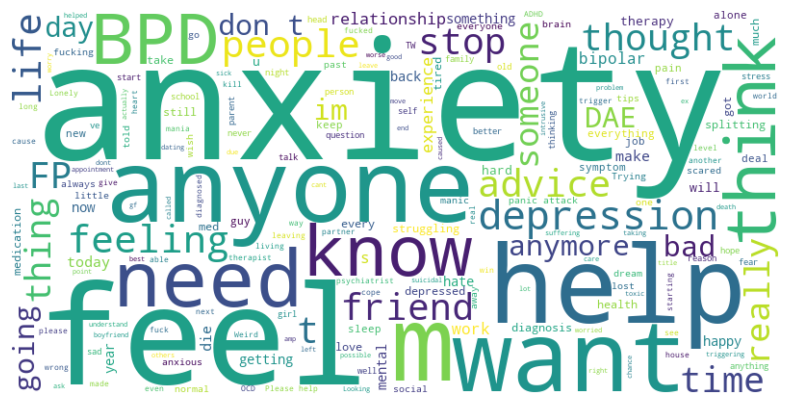

In [32]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(sampled_df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

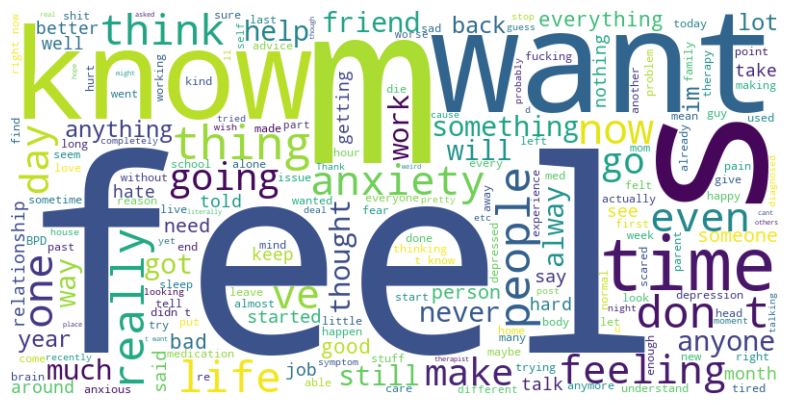

In [33]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(sampled_df['selftext']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

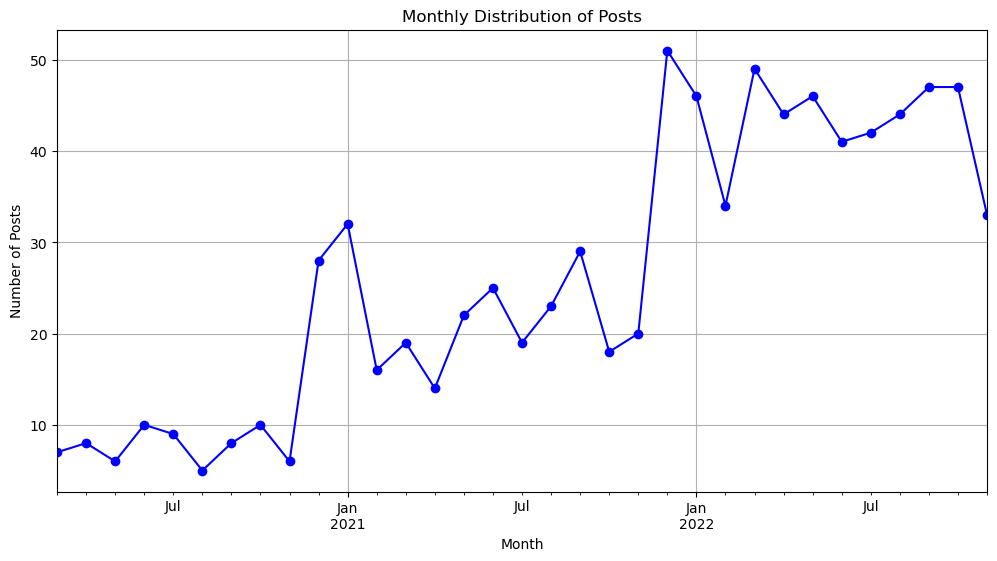

In [34]:
tenporal_analysis = sampled_df.copy()
tenporal_analysis['created_utc'] = pd.to_datetime(tenporal_analysis['created_utc'])
tenporal_analysis.set_index('created_utc', inplace=True)

# Resample to get monthly distribution of posts
monthly_posts = tenporal_analysis.resample('M').size()

# Plotting
plt.figure(figsize=(12, 6))
monthly_posts.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Distribution of Posts')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

In [59]:
# Use sampled_df.head() for the next parts